# APPLE week stock price RNN example

In [ ]:
tf.keras.backend.clear_session()

NameError: ignored

# Realstic Data - BTC

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
data = pd.read_csv('/content/AAPL-week.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-30,40.532501,46.062500,40.459999,45.957500,43.751732,1011222800
1,2018-05-07,46.294998,47.592499,45.917500,47.147499,44.884624,593067600
2,2018-05-14,47.252499,47.382500,46.275002,46.577499,44.512970,396995200
3,2018-05-21,47.000000,47.412498,46.439999,47.145000,45.055313,377579600
4,2018-05-28,46.900002,47.564999,46.535000,47.560001,45.451920,368519600


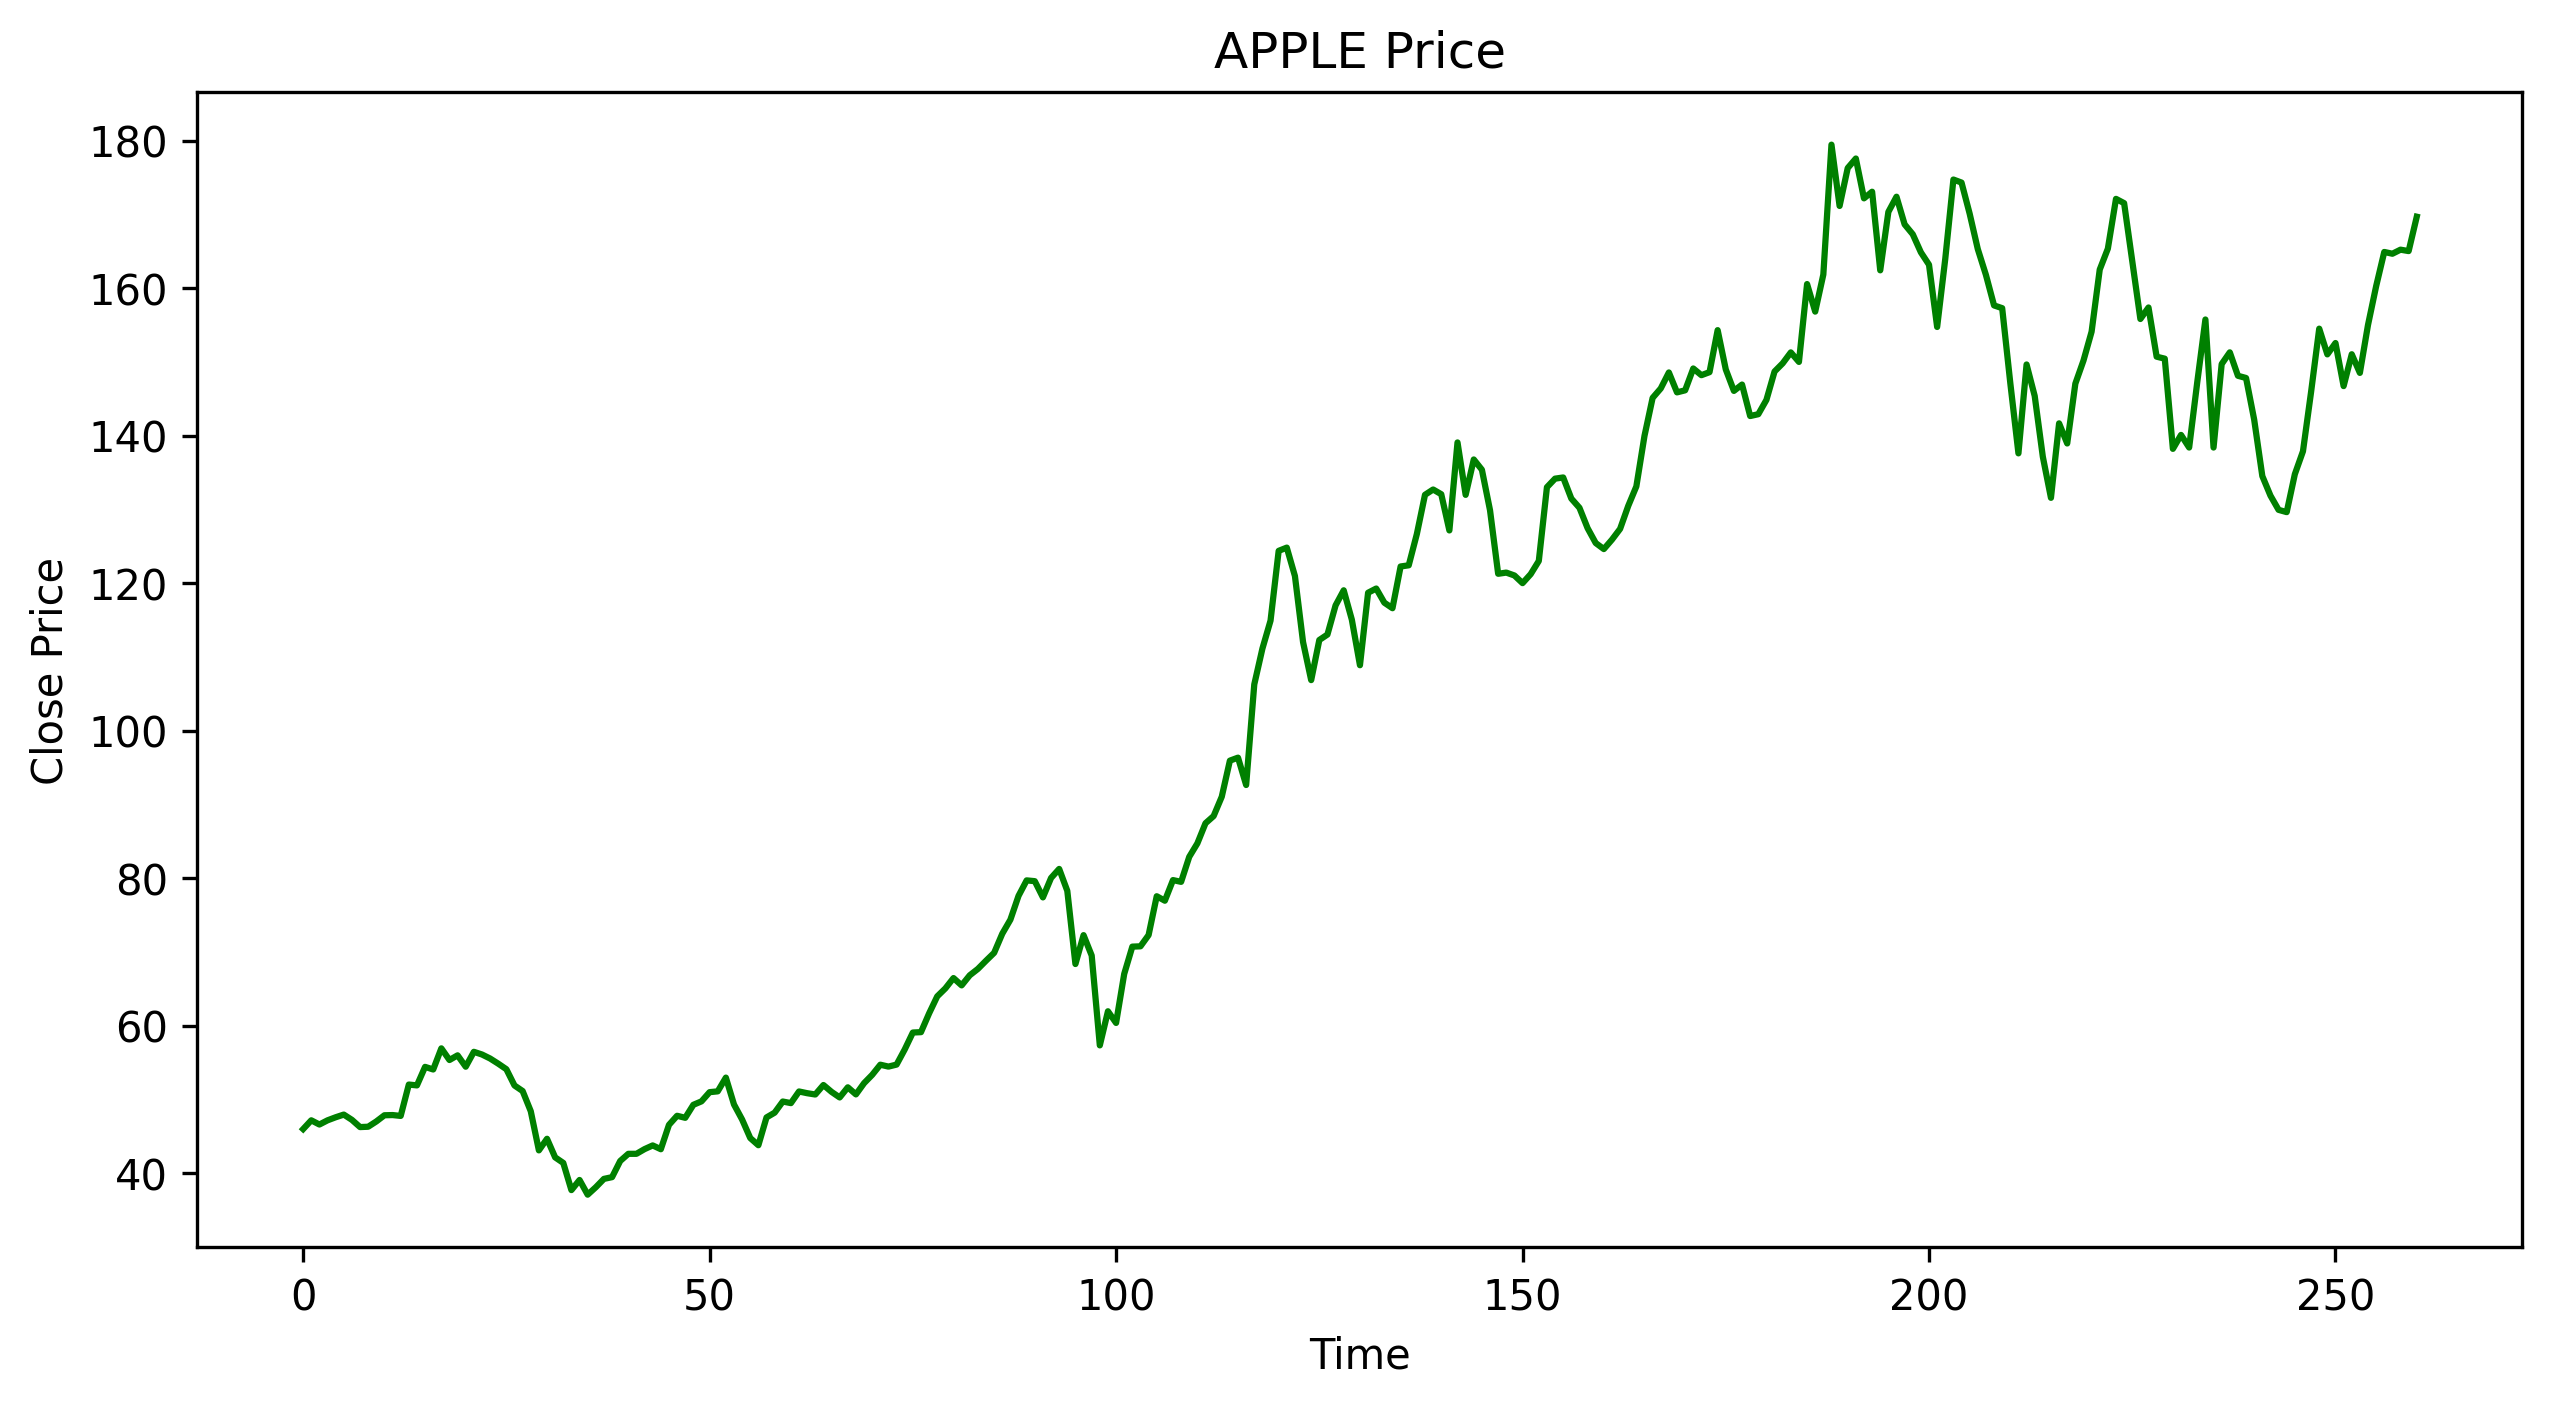

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('APPLE Price')
plt.xlabel('Time')
plt.show()

In [ ]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
#Test=Test.reset_index(drop=True)

In [ ]:
Test


208    157.649994
209    157.279999
210    147.110001
211    137.589996
212    149.639999
213    145.380005
214    137.130005
215    131.559998
216    141.660004
217    138.929993
218    147.039993
219    150.169998
220    154.089996
221    162.509995
222    165.350006
223    172.100006
224    171.520004
225    163.619995
226    155.809998
227    157.369995
228    150.699997
229    150.429993
230    138.199997
231    140.089996
232    138.380005
233    147.270004
234    155.740005
235    138.380005
236    149.699997
237    151.289993
238    148.110001
239    147.809998
240    142.160004
241    134.509995
242    131.860001
243    129.929993
244    129.619995
245    134.759995
246    137.869995
247    145.929993
248    154.500000
249    151.009995
250    152.550003
251    146.710007
252    151.029999
253    148.500000
254    155.000000
255    160.250000
256    164.899994
257    164.660004
258    165.210007
259    165.020004
260    169.679993
Name: Close, dtype: float64

In [ ]:
Test=Test.reset_index(drop=True)
Test

0     157.649994
1     157.279999
2     147.110001
3     137.589996
4     149.639999
5     145.380005
6     137.130005
7     131.559998
8     141.660004
9     138.929993
10    147.039993
11    150.169998
12    154.089996
13    162.509995
14    165.350006
15    172.100006
16    171.520004
17    163.619995
18    155.809998
19    157.369995
20    150.699997
21    150.429993
22    138.199997
23    140.089996
24    138.380005
25    147.270004
26    155.740005
27    138.380005
28    149.699997
29    151.289993
30    148.110001
31    147.809998
32    142.160004
33    134.509995
34    131.860001
35    129.929993
36    129.619995
37    134.759995
38    137.869995
39    145.929993
40    154.500000
41    151.009995
42    152.550003
43    146.710007
44    151.029999
45    148.500000
46    155.000000
47    160.250000
48    164.899994
49    164.660004
50    165.210007
51    165.020004
52    169.679993
Name: Close, dtype: float64

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = []
y_train = []
for i in range(5,len(test_set)):
    X_train.append(test_set_scaled[i-5:i])
    y_train.append(test_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = []
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i])
    y_val.append(val_set_scaled[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i])
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#X_train[0]

# Fit & compile the model

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    LSTM(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(optimizer = opt, loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
2/2 [==============================] - 4s 589ms/step - loss: 1.3434 - val_loss: 1.5219
Epoch 2/100
2/2 [==============================] - 0s 59ms/step - loss: 1.2541 - val_loss: 1.4208
Epoch 3/100
2/2 [==============================] - 0s 63ms/step - loss: 1.1677 - val_loss: 1.3228
Epoch 4/100
2/2 [==============================] - 0s 57ms/step - loss: 1.0851 - val_loss: 1.2276
Epoch 5/100
2/2 [==============================] - 0s 65ms/step - loss: 1.0043 - val_loss: 1.1349
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 0.9257 - val_loss: 1.0445
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.8484 - val_loss: 0.9560
Epoch 8/100
2/2 [==============================] - 0s 56ms/step - loss: 0.7744 - val_loss: 0.8692
Epoch 9/100
2/2 [==============================] - 0s 68ms/step - loss: 0.7007 - val_loss: 0.7841
Epoch 10/100
2/2 [==============================] - 0s 59ms/step - loss: 0.6290 - val_loss: 0.7007
Epoch 11/100
2/2 [

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

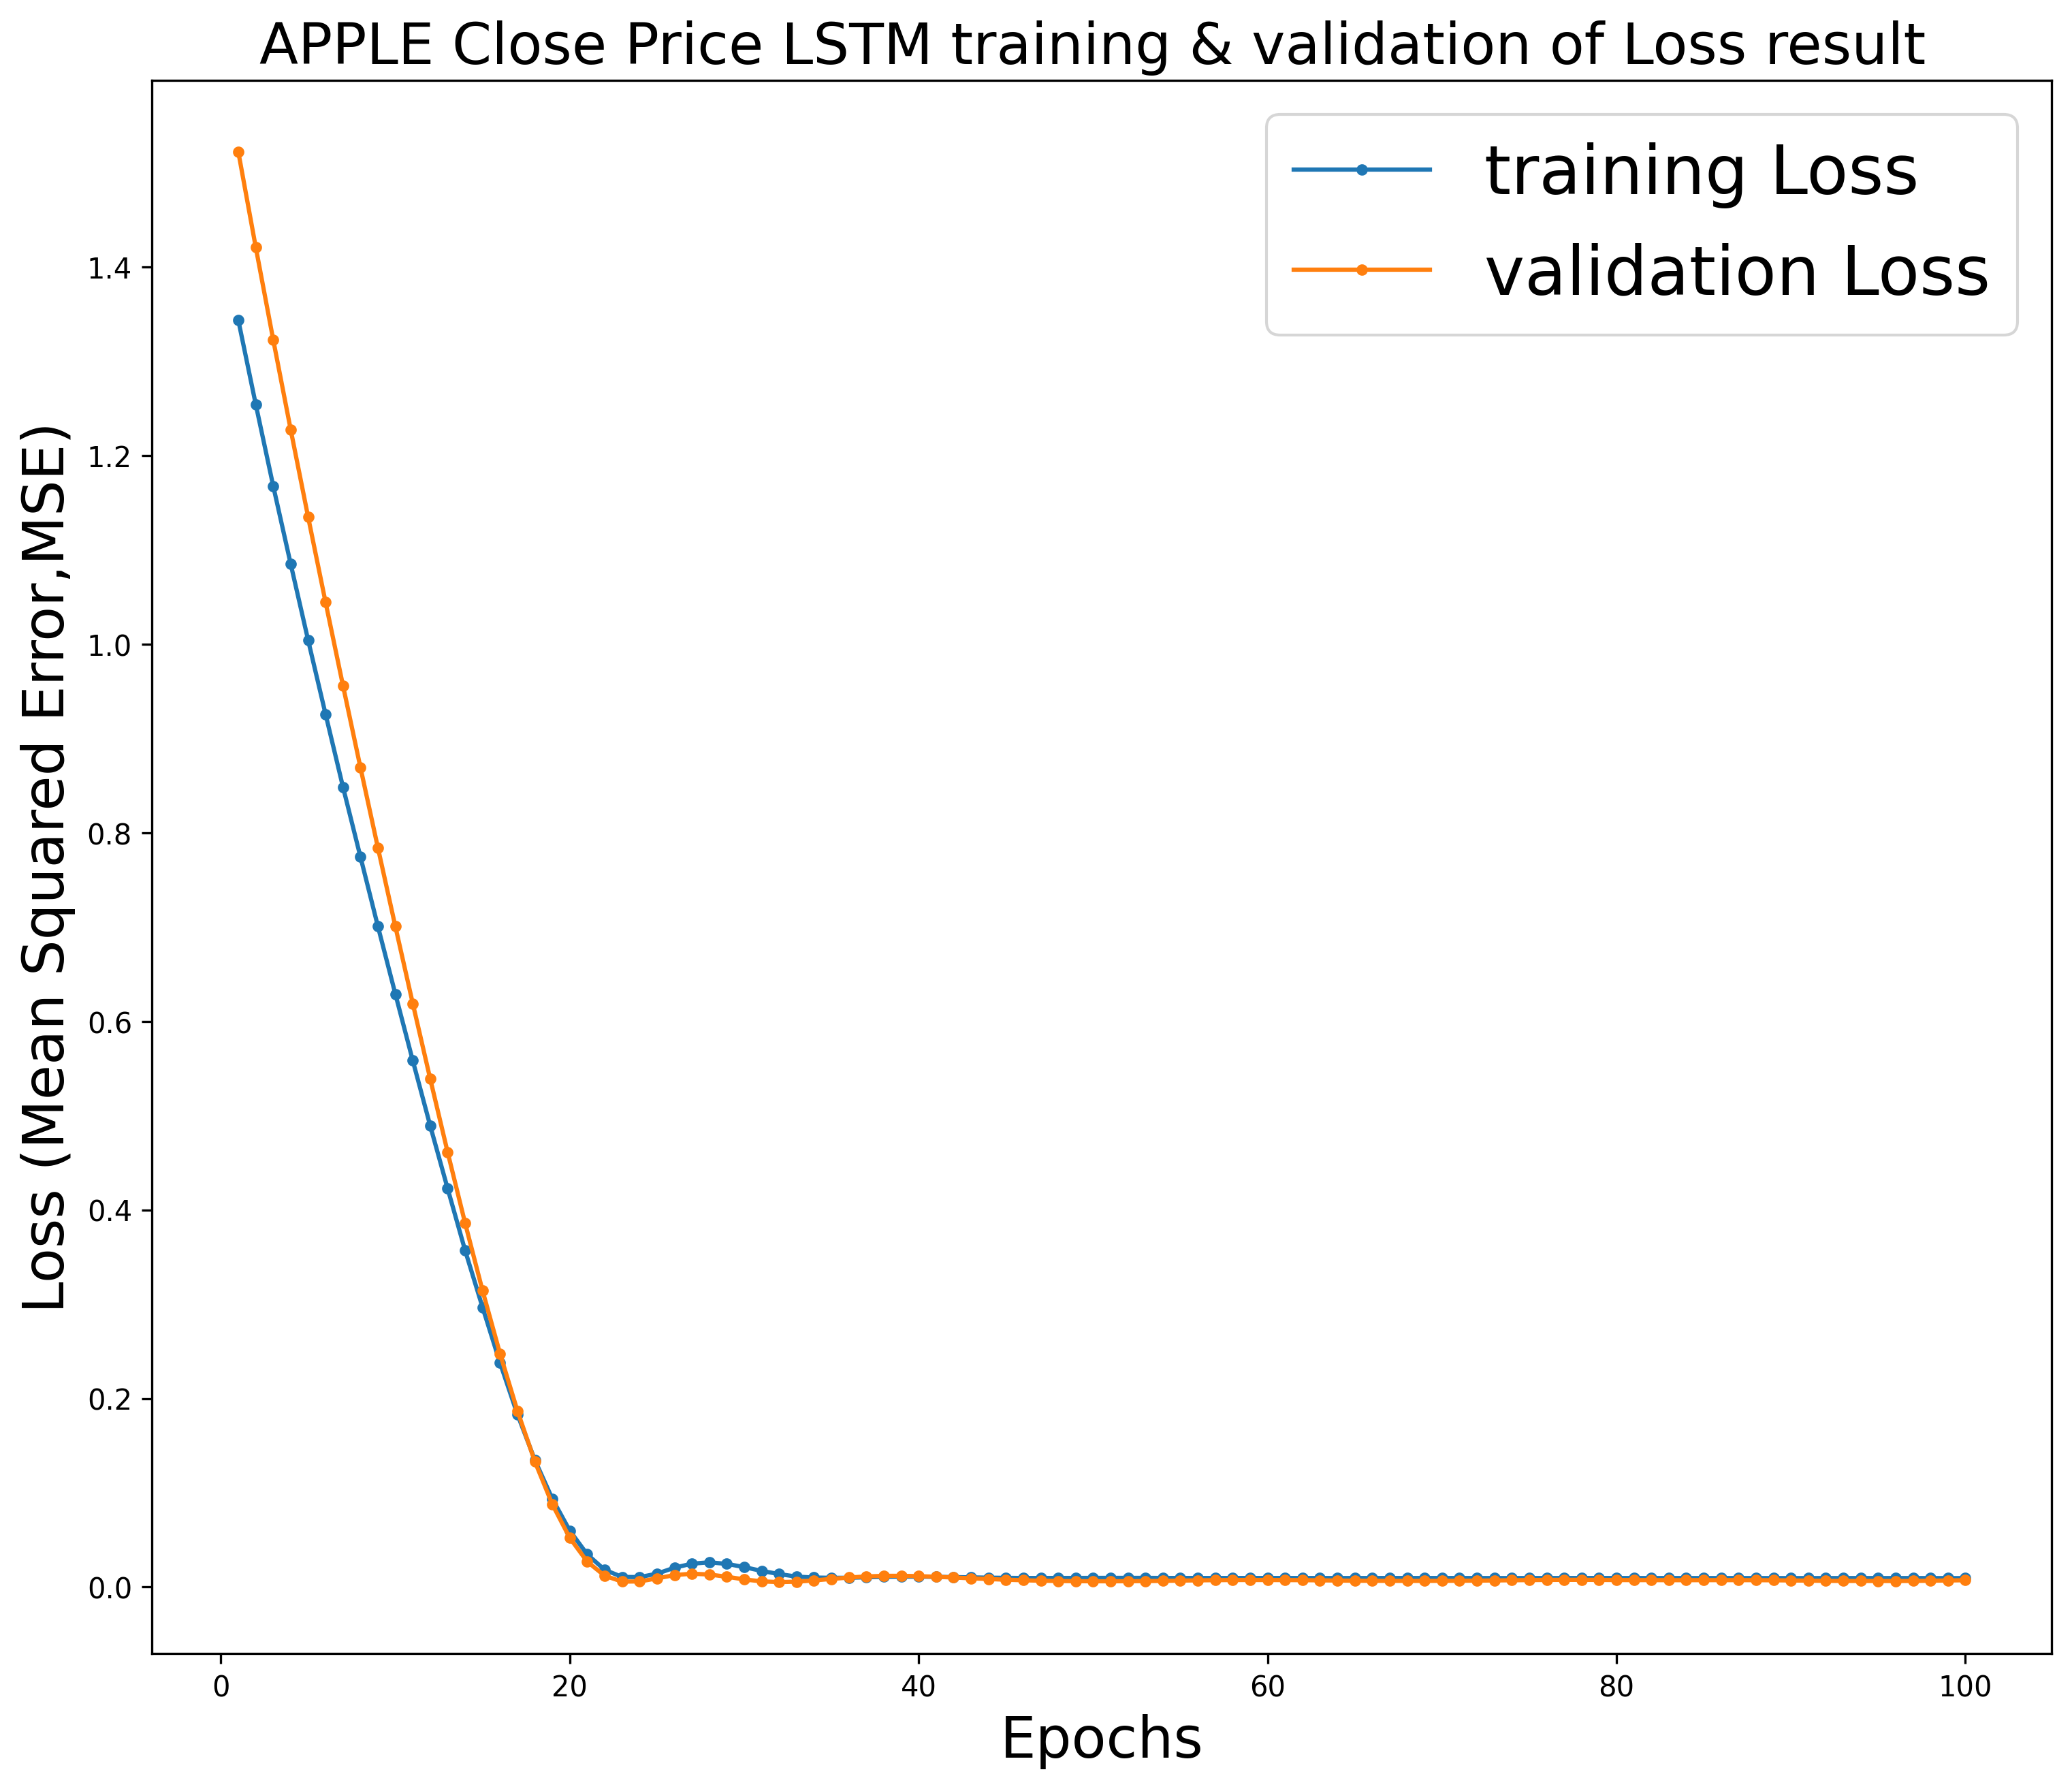

In [ ]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('APPLE Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [ ]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

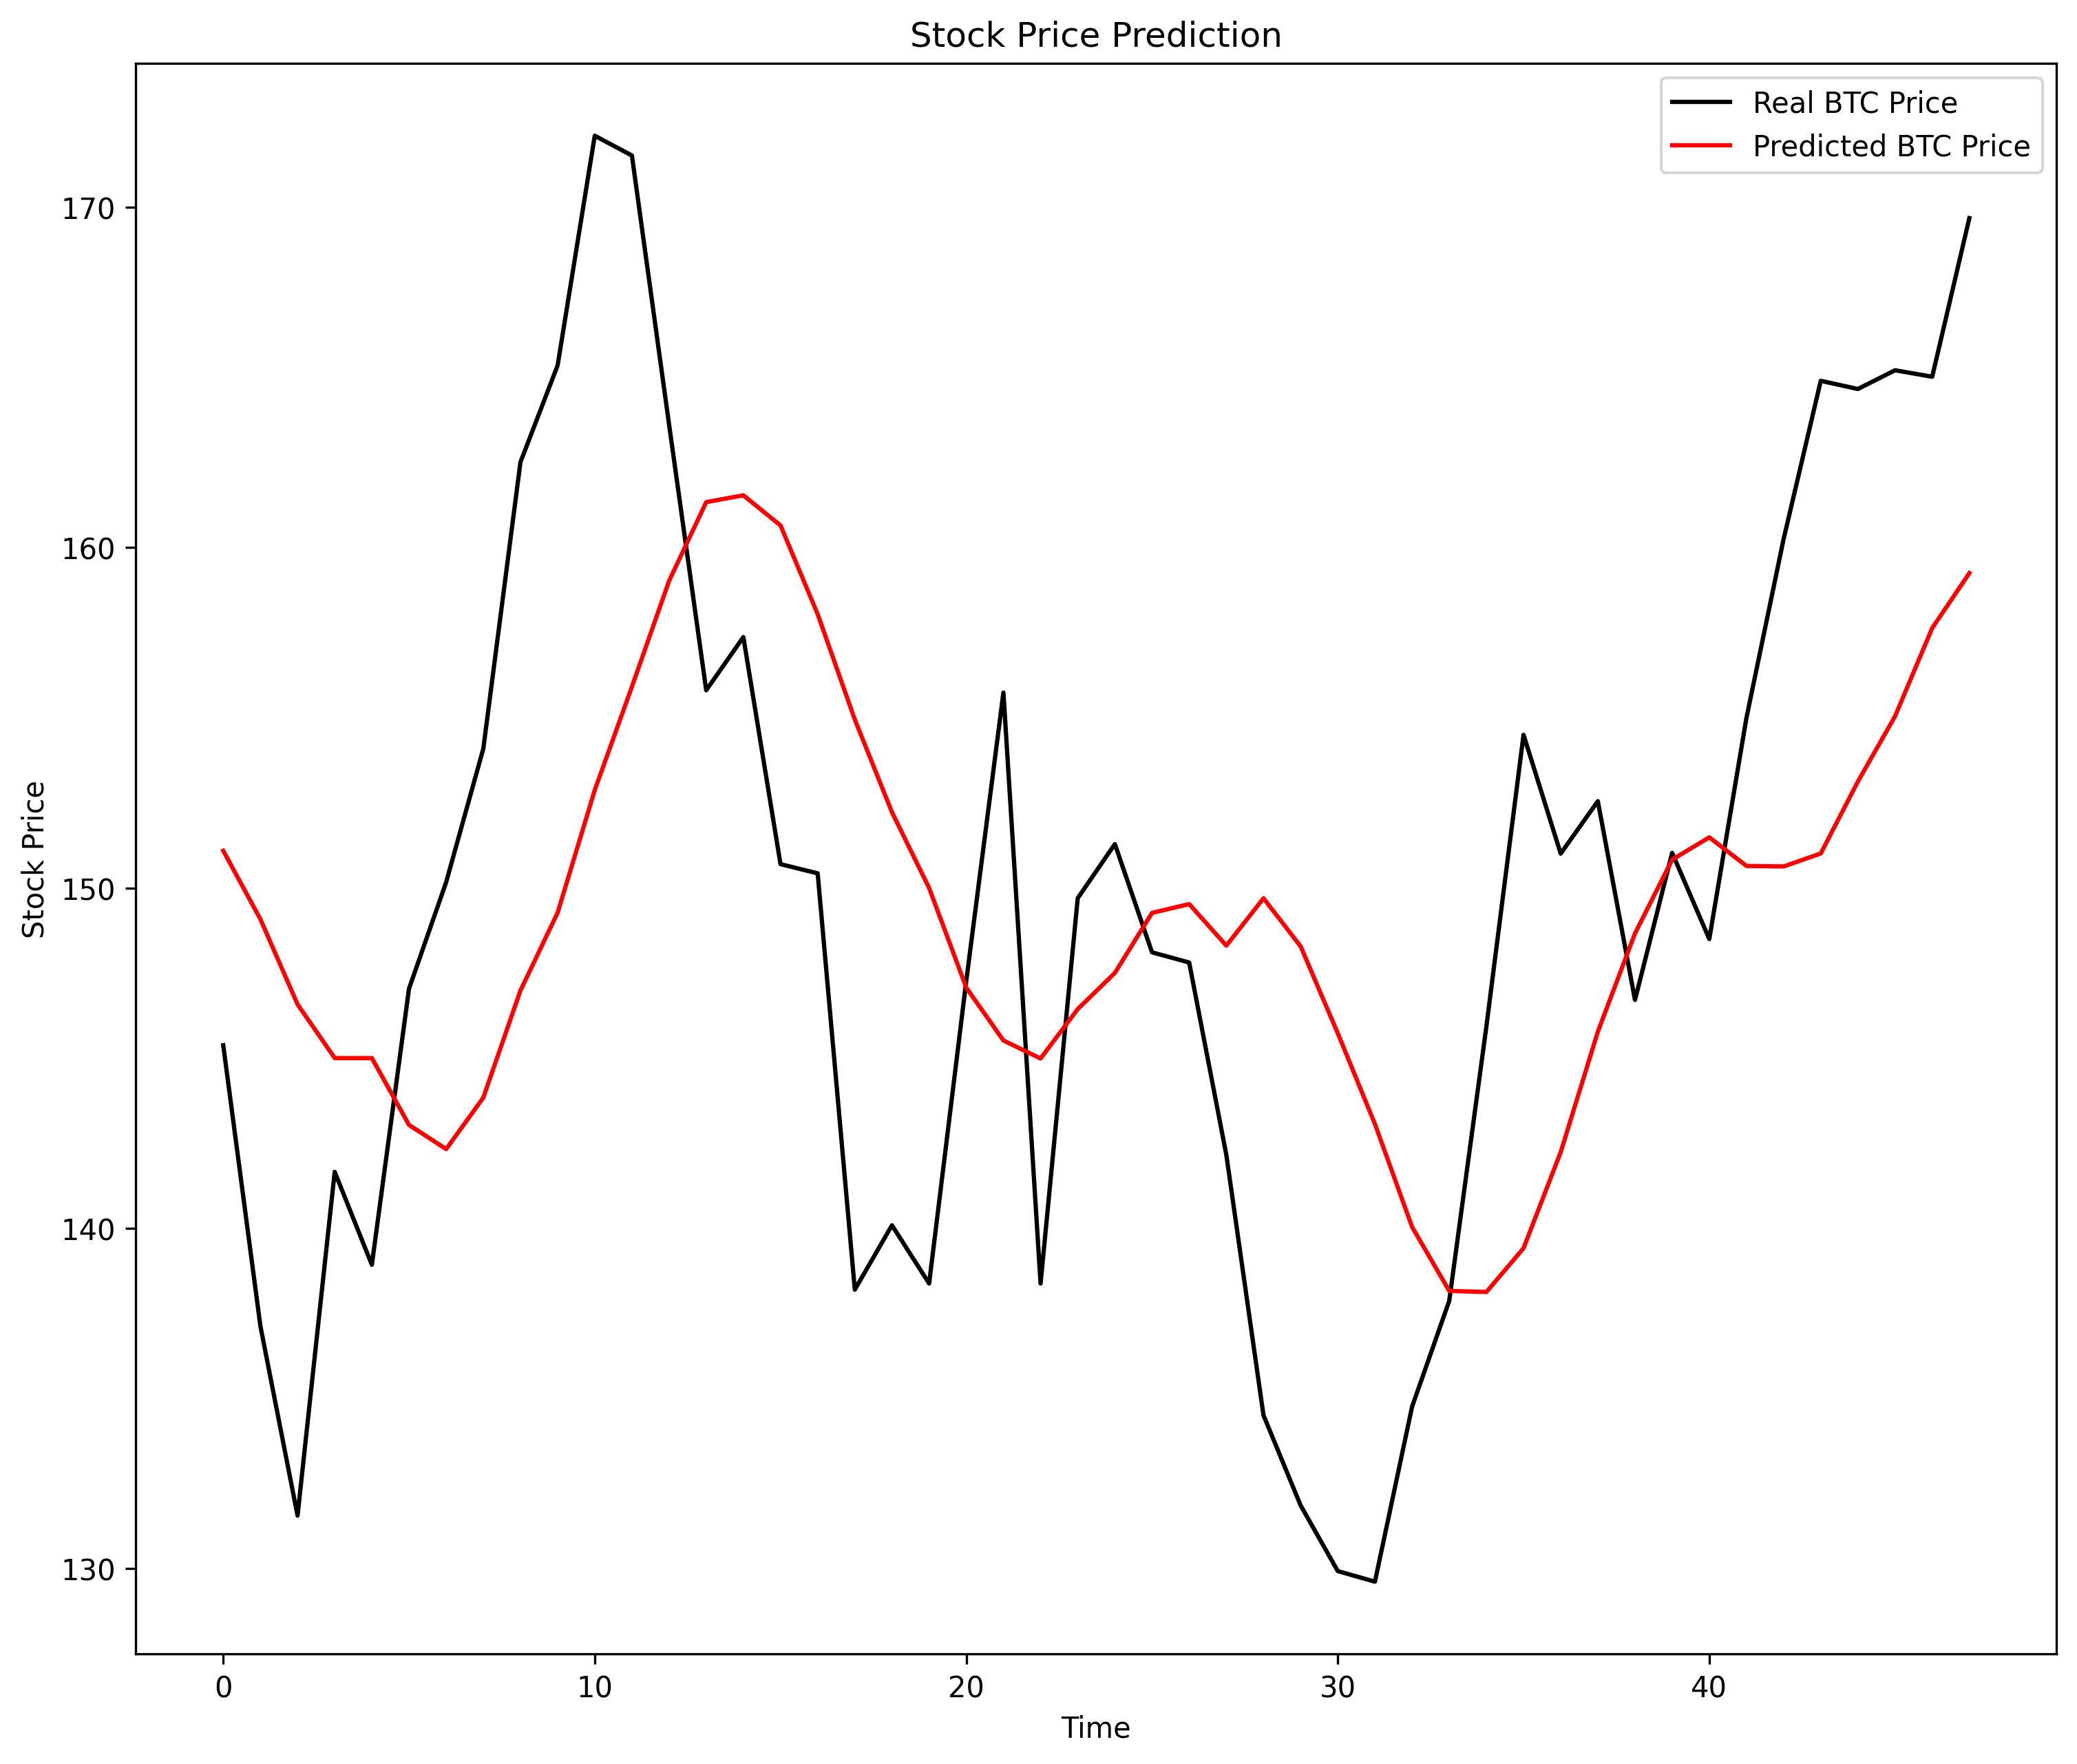

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Improve the model

## Build model & Compile & Fit

In [ ]:
from tensorflow.keras.layers import SimpleRNN


keras.backend.clear_session()
model = Sequential()

model.add(SimpleRNN(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 32,activation='relu'))
model.add(Dense(units = 1))

model.summary()
opt=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 64)             4224      
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 64,verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.4460 - val_loss: 2.9877
Epoch 2/100
1/1 [==============================] - 0s 79ms/step - loss: 2.2855 - val_loss: 1.6039
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 1.3307 - val_loss: 0.6320
Epoch 4/100
1/1 [==============================] - 0s 88ms/step - loss: 0.5460 - val_loss: 0.1262
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2029 - val_loss: 0.0072
Epoch 6/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0621 - val_loss: 0.1220
Epoch 7/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0992 - val_loss: 0.3317
Epoch 8/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2425 - val_loss: 0.5025
Epoch 9/100
1/1 [==============================] - 0s 67ms/step - loss: 0.4813 - val_loss: 0.5611
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.4062 - val_loss: 0.5293
Epoch 11/100
1/1 [===

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

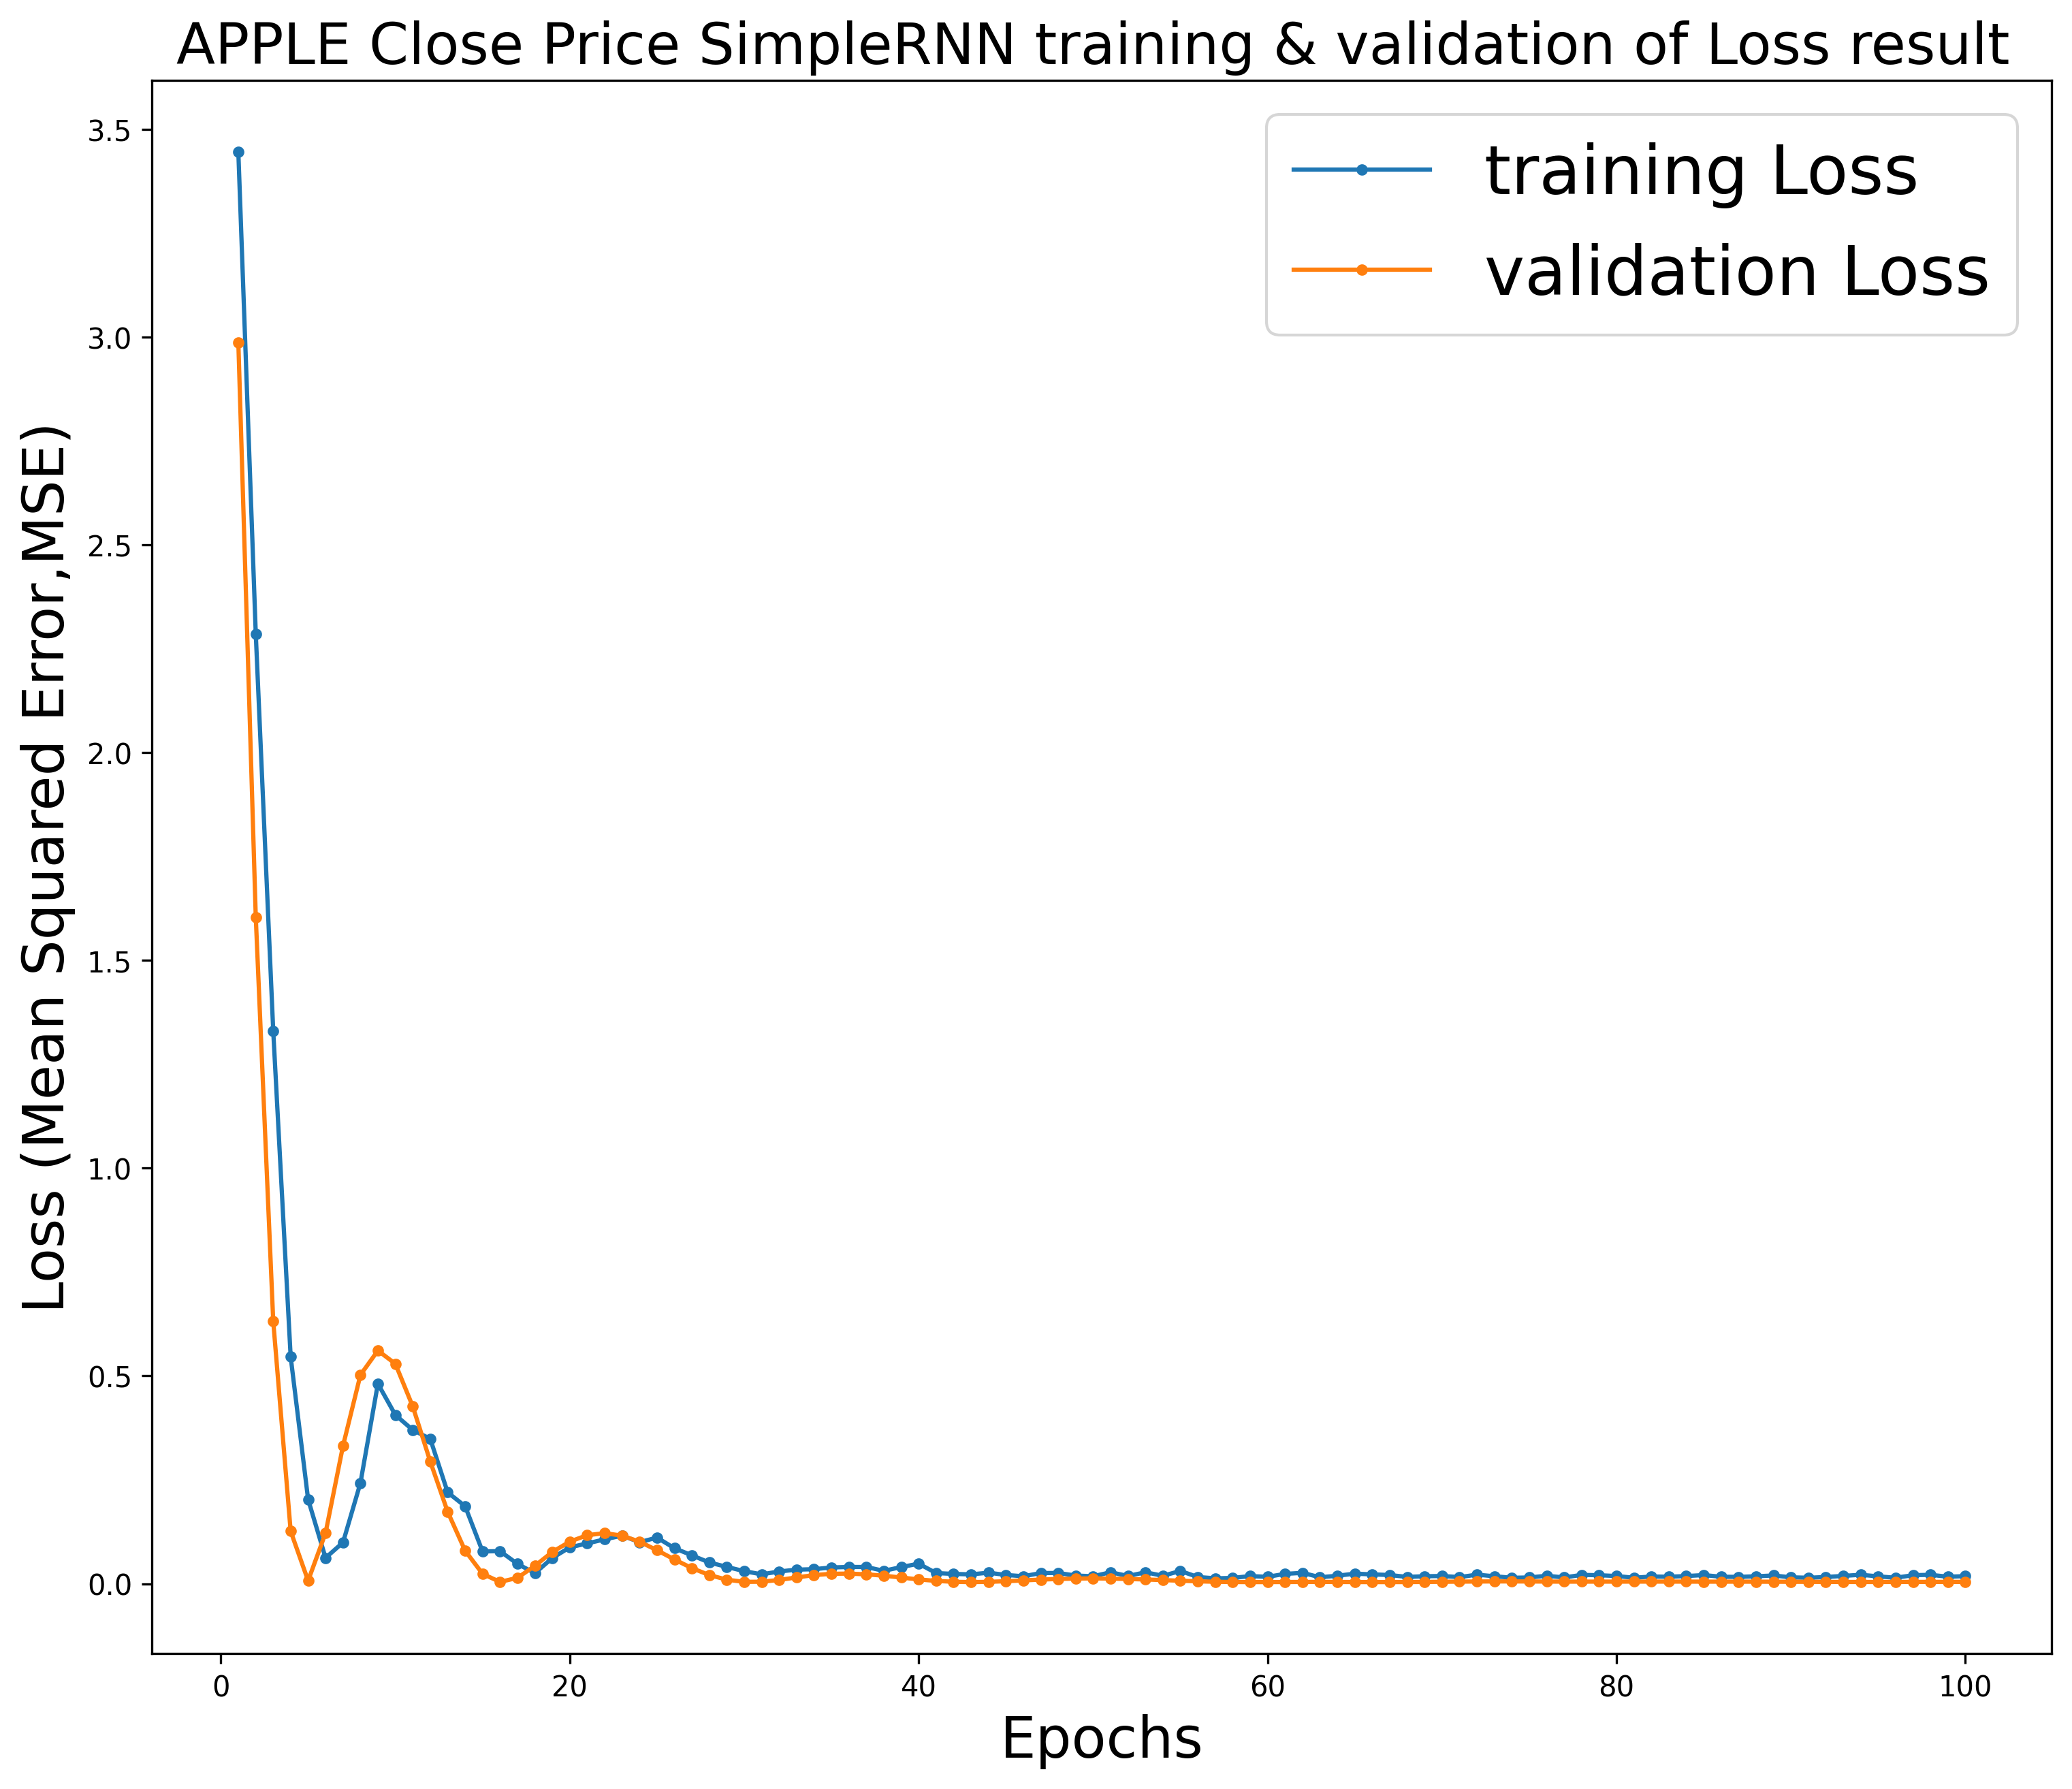

In [ ]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('APPLE Close Price SimpleRNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

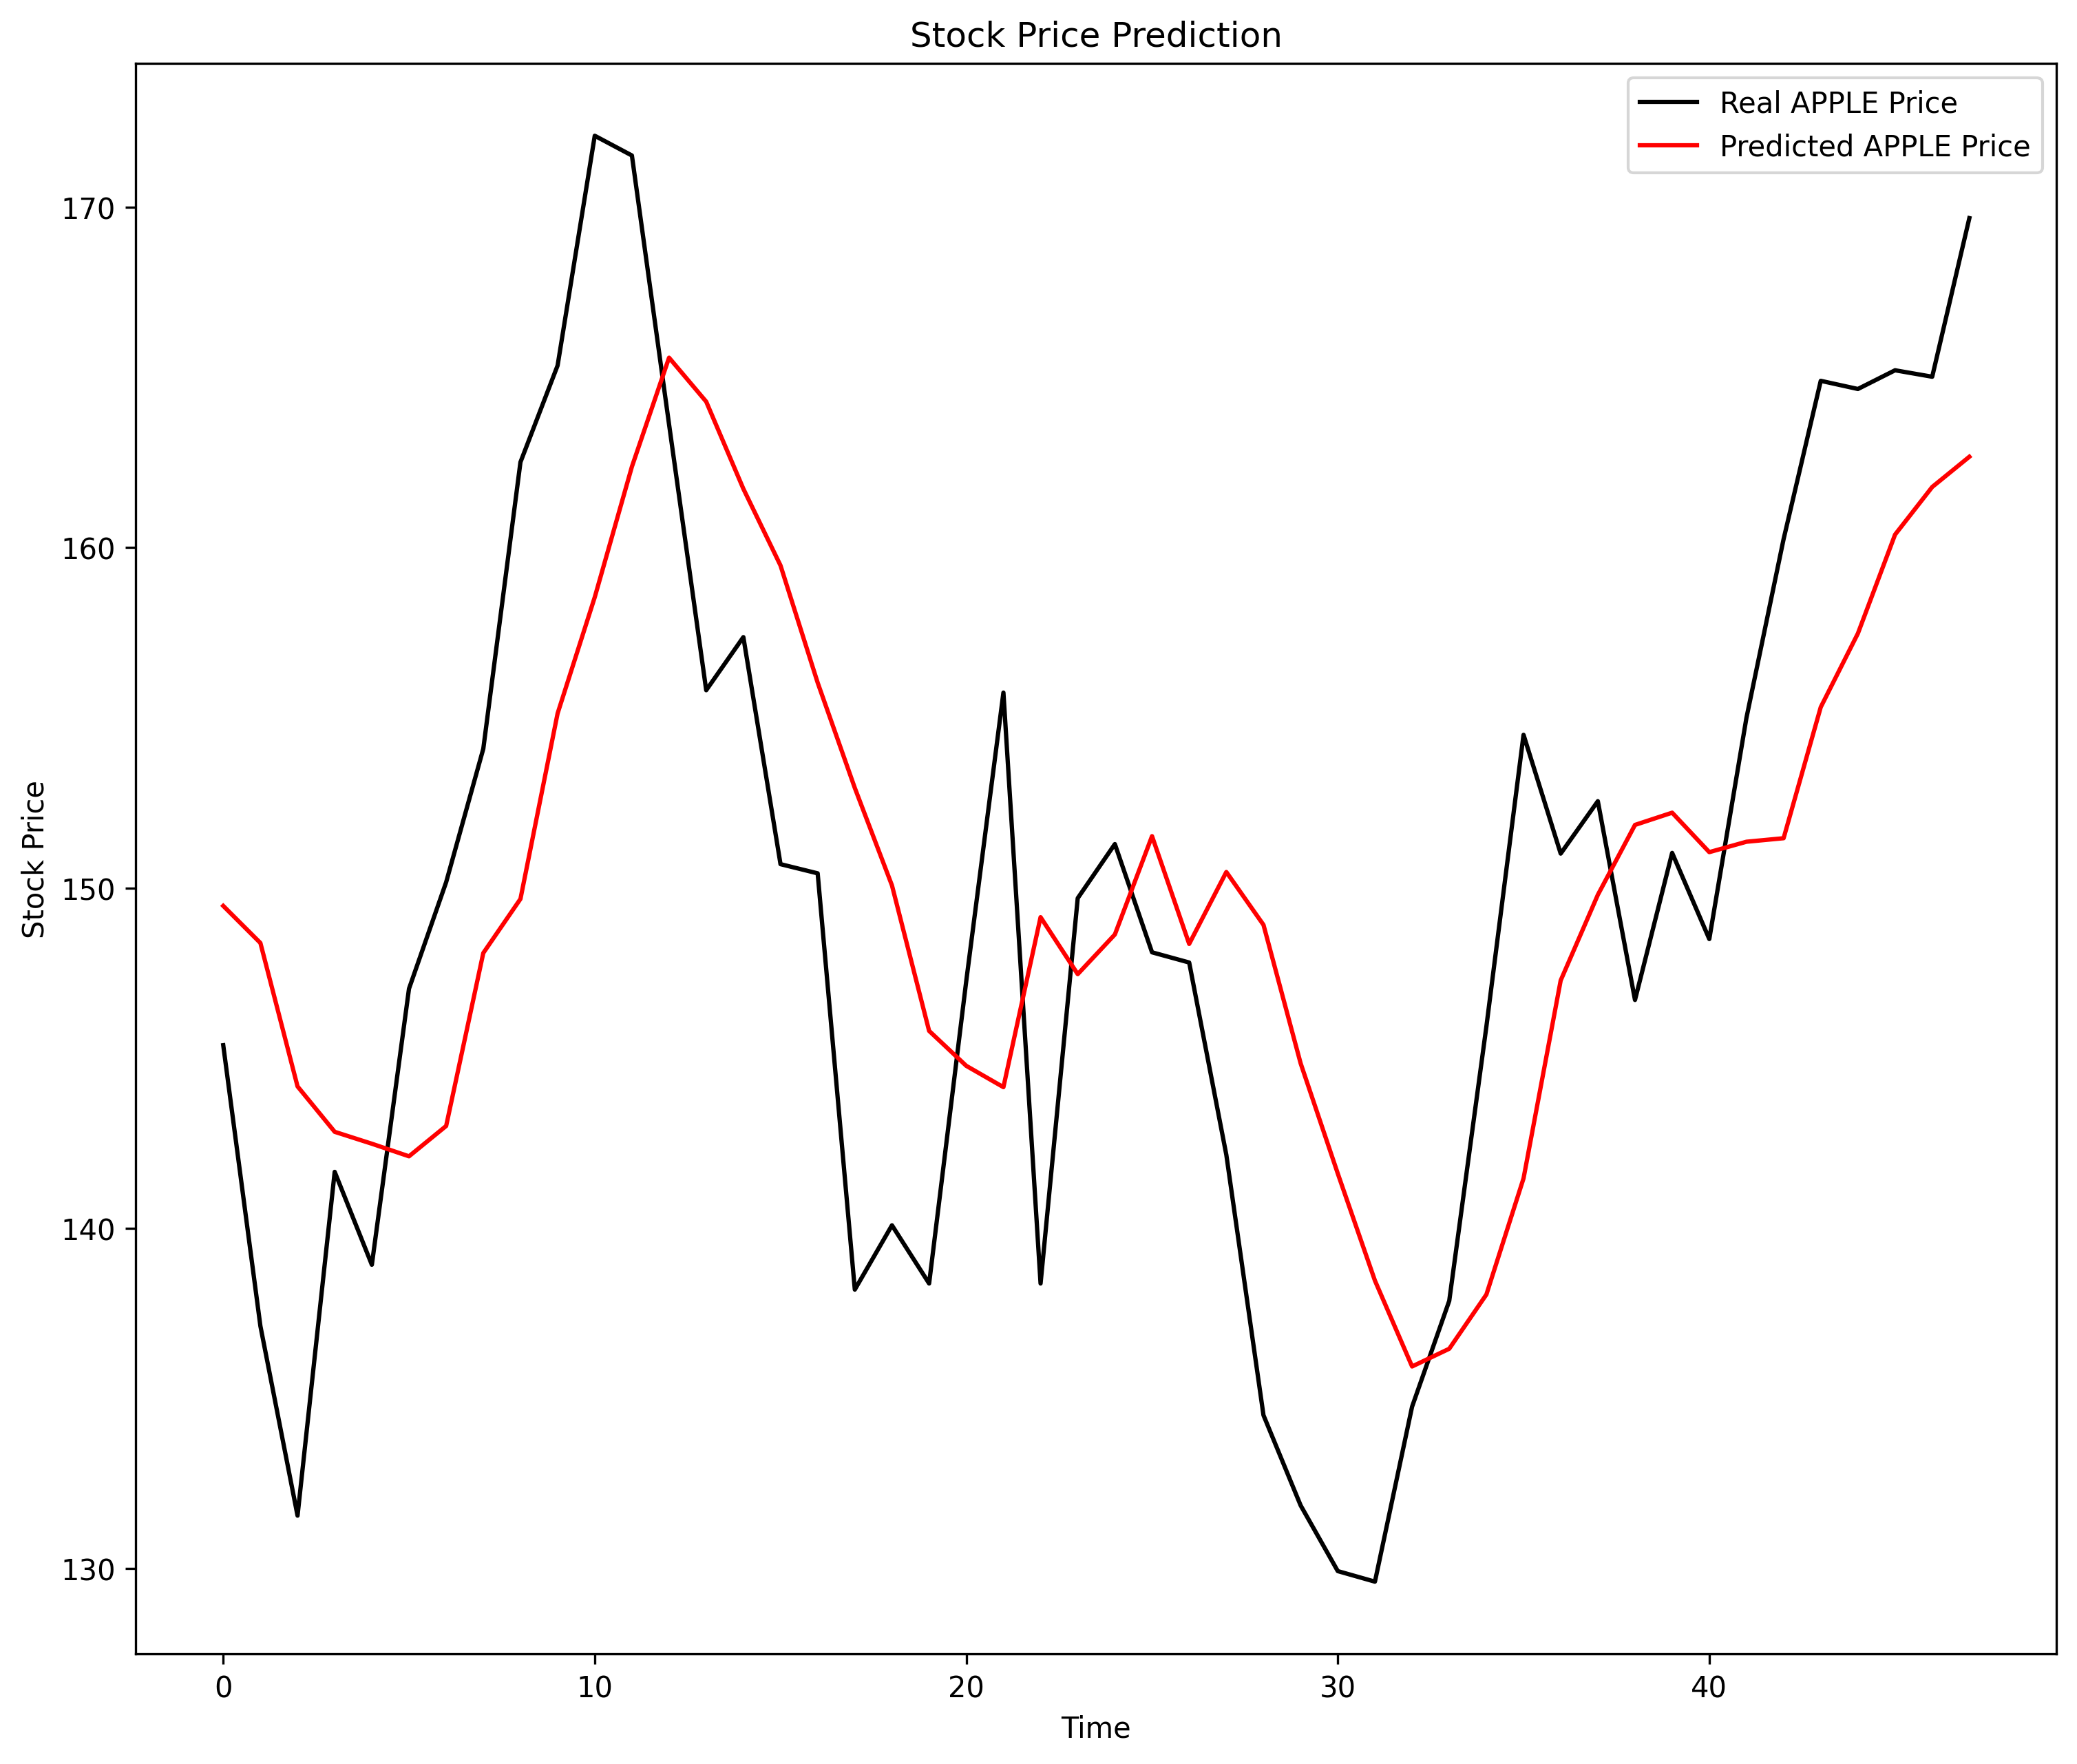

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real APPLE Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted APPLE Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 6.894
MSE: 64.331
RMSE: 8.021
MAPE: 4.656 %
SMAPE: 4.622 %
RAE: 0.747
MRAE: 0.015560740430564013
MdRAE: 0.92 bench: 149.708
RSE: 0.497
RRSE: 0.705


# 多變量使用的方法 把切好的原始資料套用方法

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)